<a href="https://colab.research.google.com/github/drwitt/BME_590_Tensorflow_Deep_Learning/blob/master/Copy_of_Tensorflow_image_preprocessing_and_Keras_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow Loading Data Set (Images) and Pre-Processing**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

'1.14.0'

In [0]:
#Get available image data on tflow:
import tensorflow as tf

import pathlib
data_root_orig = tf.keras.utils.get_file('flower_photos',
                                         'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 4s 0us/step
/root/.keras/datasets/flower_photos


In [0]:
for item in data_root.iterdir():
  print(item)

/root/.keras/datasets/flower_photos/LICENSE.txt
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/dandelion


In [0]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [0]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [0]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

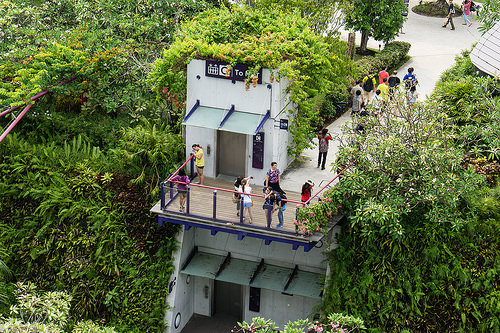

Image (CC BY 2.0)  by aamanatullah



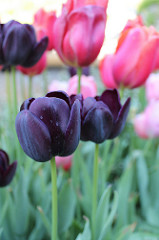

Image (CC BY 2.0)  by Elvert Barnes



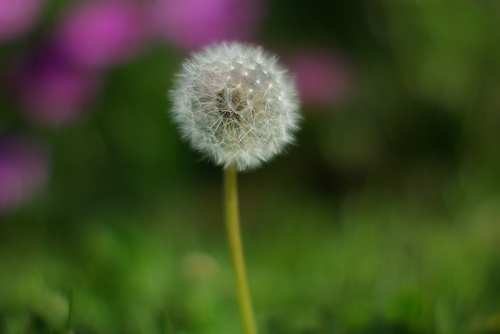

Image (CC BY 2.0)  by Alejandro Lopez



In [0]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [0]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [0, 4, 1, 0, 3, 2, 2, 1, 0, 4]


In [0]:
#Process data into raw arrays for modeling:
img_path = all_image_paths[0]
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=32, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\...


In [0]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=35, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\...


In [0]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(240, 239, 3)
<dtype: 'uint8'>


In [0]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
0.95520836


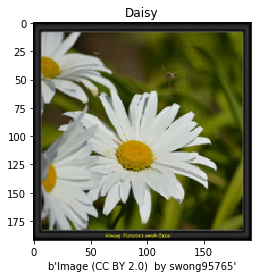

In [0]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()

**Example of how you would add on to Keras Layer class with a method within
a tensorflow class; use inheritance or make a class instance within new class**

In [0]:
class Layers(tf.image):
  
  def __init__(self, image, shape, resize_scale):
    super().__init__(image, shape)
    self.resize_scale = resize_scale
    pass
    
  def resize(self):
    resized_img = self.resize(self.image, [self.resize_scale*shape[0], self.resize_scale*shape[1]])
    return resized_img
  

**Running a Keras Model: Skeleton Template for Model**

In [0]:
from keras.models import Sequential

model = Sequential()

from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=5, batch_size=32)

#Evaluation:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

#Make predicitons of y/response values given feature vector:

classes = model.predict(x_test, batch_size=128)

